<a href="https://colab.research.google.com/github/dn3hx/Bahdanau-Algorithm_SOP-Simulation/blob/main/SOP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heavy Model Time: 3.710355281829834
Light Model Time: 1.5732746124267578


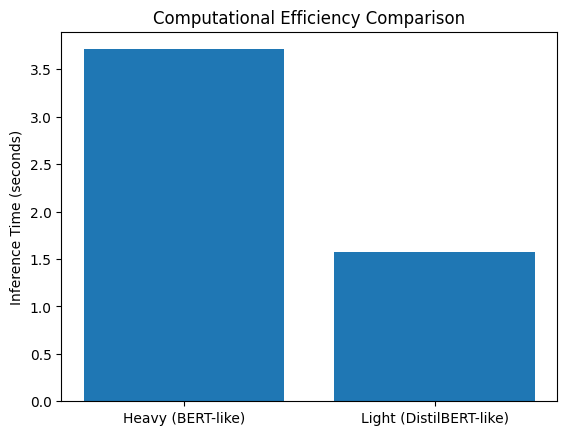

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt

torch.manual_seed(0)

# -----------------------------
# Simulated Heavy Model (BERT-like)
# -----------------------------

class HeavyAttention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.W_s = nn.Linear(hidden_size, hidden_size)
        self.W_h = nn.Linear(hidden_size, hidden_size)
        self.v = nn.Linear(hidden_size, 1)

    def forward(self, decoder_state, encoder_hidden):
        scores = []
        for h_i in encoder_hidden:
            score = self.v(torch.tanh(self.W_s(decoder_state) + self.W_h(h_i)))
            scores.append(score)
        scores = torch.stack(scores).squeeze()
        return F.softmax(scores, dim=0)


# -----------------------------
# Simulated Lightweight Model (DistilBERT-like)
# -----------------------------

class LightAttention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.W_s = nn.Linear(hidden_size, hidden_size)
        self.W_h = nn.Linear(hidden_size, hidden_size)
        self.v = nn.Linear(hidden_size, 1)

    def forward(self, decoder_state, encoder_hidden):
        scores = []
        for h_i in encoder_hidden:
            score = self.v(torch.tanh(self.W_s(decoder_state) + self.W_h(h_i)))
            scores.append(score)
        scores = torch.stack(scores).squeeze()
        return F.softmax(scores, dim=0)


# -----------------------------
# Setup
# -----------------------------

sequence_length = 50

# Heavy configuration (like BERT)
heavy_hidden = 768

# Light configuration (like DistilBERT)
light_hidden = 384

heavy_encoder = torch.randn(sequence_length, heavy_hidden)
heavy_decoder = torch.randn(heavy_hidden)

light_encoder = torch.randn(sequence_length, light_hidden)
light_decoder = torch.randn(light_hidden)

heavy_model = HeavyAttention(heavy_hidden)
light_model = LightAttention(light_hidden)

# -----------------------------
# Measure Inference Time
# -----------------------------

runs = 200

# Heavy Model Timing
start = time.time()
for _ in range(runs):
    heavy_model(heavy_decoder, heavy_encoder)
heavy_time = time.time() - start

# Light Model Timing
start = time.time()
for _ in range(runs):
    light_model(light_decoder, light_encoder)
light_time = time.time() - start

print("Heavy Model Time:", heavy_time)
print("Light Model Time:", light_time)

# -----------------------------
# Visualization
# -----------------------------

models = ["Heavy (BERT-like)", "Light (DistilBERT-like)"]
times = [heavy_time, light_time]

plt.figure()
plt.bar(models, times)
plt.ylabel("Inference Time (seconds)")
plt.title("Computational Efficiency Comparison")
plt.show()
